In [9]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
#import the data
df = pd.read_csv(r"D:\Codes\MLproject\notebook\data\raw.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#create X and y variable
X = df.drop(columns = ["math_score"], axis = 1)
y = df.math_score
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [6]:
#unique values from categorical data

print("Categories in 'gender' variable: ", end = "")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end = "")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end = "")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end = "")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end = "")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [7]:
#import libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#create numerical and categorical features
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

#initialize the features
numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

#create column transformer
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numerical_transformer, num_features),
    ]
)

In [8]:
#fit and transform the model
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [10]:
#seperate dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [11]:
#create the evaluation function to give all metrics after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [12]:
#create the models for automation
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso Regressor" : Lasso(),
    "Ridge Regressor" : Ridge(),
    "KNeighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose= False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

In [15]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    #train the model
    model.fit(X_train, y_train)
    #make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    #print the list of models one by one
    print(list(models.keys())[i], "-->")
    model_list.append(list(models.keys())[i])

    print("Model Performance for Traning Set: ")
    print(" - Root Mean Square Error : {:.2f}".format(model_train_rmse))
    print(" - Mean Absolute Error : {:.2f}".format(model_train_mae))
    print(" - R2 Score : {:.2f}".format(model_train_r2))
    print("-------------------------------------")

    print("Model Performance for Testing Set: ")
    print(" - Root Mean Square Error : {:.2f}".format(model_test_rmse))
    print(" - Mean Absolute Error : {:.2f}".format(model_test_mae))
    print(" - R2 Score : {:.2f}".format(model_test_r2))
    print("======================================")

    r2_list.append(model_test_r2)
    print("\n")

Linear Regression -->
Model Performance for Traning Set: 
 - Root Mean Square Error : 5.22
 - Mean Absolute Error : 4.20
 - R2 Score : 0.88
-------------------------------------
Model Performance for Testing Set: 
 - Root Mean Square Error : 5.80
 - Mean Absolute Error : 4.50
 - R2 Score : 0.85


Lasso Regressor -->
Model Performance for Traning Set: 
 - Root Mean Square Error : 6.41
 - Mean Absolute Error : 5.11
 - R2 Score : 0.82
-------------------------------------
Model Performance for Testing Set: 
 - Root Mean Square Error : 7.40
 - Mean Absolute Error : 5.70
 - R2 Score : 0.76


Ridge Regressor -->
Model Performance for Traning Set: 
 - Root Mean Square Error : 5.22
 - Mean Absolute Error : 4.20
 - R2 Score : 0.88
-------------------------------------
Model Performance for Testing Set: 
 - Root Mean Square Error : 5.79
 - Mean Absolute Error : 4.49
 - R2 Score : 0.85


KNeighbors Regressor -->
Model Performance for Traning Set: 
 - Root Mean Square Error : 5.59
 - Mean Absolute

In [16]:
#create the dataframe of above data
pd.DataFrame(list(zip(model_list, r2_list)), columns = ["model_name", "r2_score"]).sort_values(
    by = ["r2_score"], ascending = False
)

,model_name,r2_score
2,Ridge Regressor,0.851557
0,Linear Regression,0.850842
7,CatBoosting Regressor,0.813339
5,Random Forest Regressor,0.796045
8,AdaBoost Regressor,0.783810
6,XGB Regressor,0.782346
1,Lasso Regressor,0.757371
3,KNeighbors Regressor,0.734669
4,Decision Tree Regressor,0.637859


In [17]:
#linear regression
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_pred, y_test)*100
print("Accuracy of model is %.2f" %score)

Accuracy of model is 82.18


Text(0, 0.5, 'predicted')

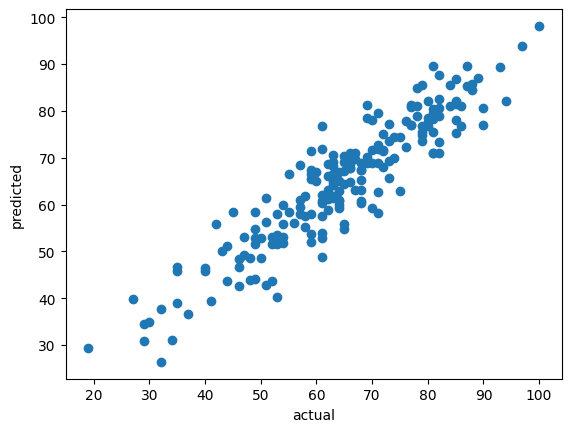

In [18]:
#plot y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")

<Axes: xlabel='math_score'>

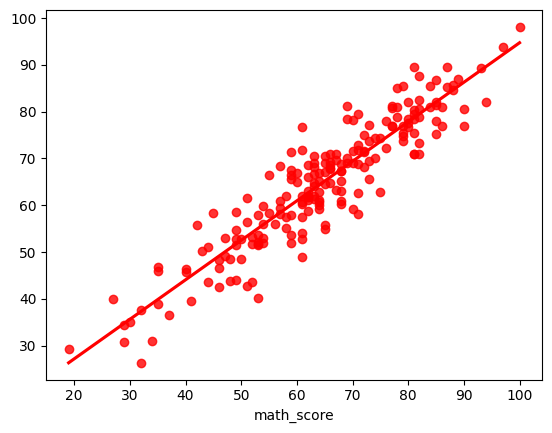

In [20]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = "red")

In [22]:
#difference between actual and prediction values
pred_df = pd.DataFrame({"actual value" : y_test,
                        "predicted value" : y_pred,
                        "difference" : y_test - y_pred})
pred_df

,actual value,predicted value,difference
530,68,60.835938,7.164062
926,64,60.695312,3.304688
586,55,66.453125,-11.453125
25,73,73.664062,-0.664062
332,62,61.132812,0.867188
...,...,...,...
918,57,68.437500,-11.437500
874,43,50.132812,-7.132812
389,73,77.101562,-4.101562
923,54,55.921875,-1.921875
